In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.covariance import MinCovDet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from matplotlib.ticker import FormatStrFormatter


In [5]:
df_MEGNET_nitrides = pd.read_csv('two_metal_nitrides_MP_database.csv')

In [8]:
df_MEGNET_oxides = pd.read_csv('two_metal_oxides_MP_database.csv')

MAE nitrides = 87.86 meV/atom, MAE oxides = 95.89 meV/atom


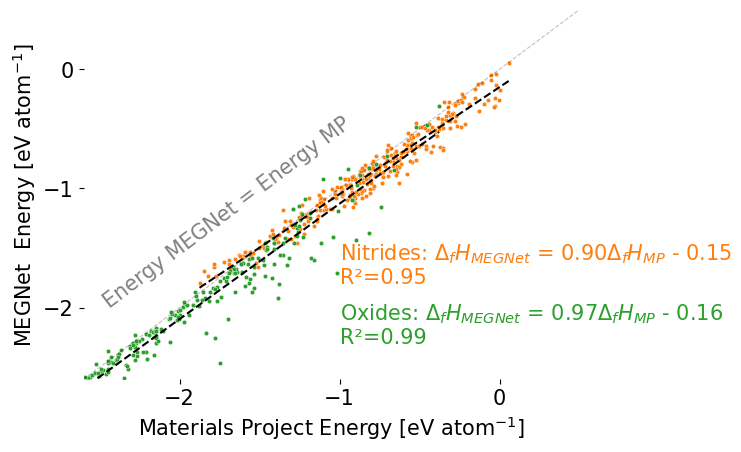

In [26]:
plt.figure()

model = LinearRegression().fit(df_MEGNET_nitrides['Ef'].values.reshape(-1, 1),
                                df_MEGNET_nitrides['Ef_MEGNET'].values.reshape(-1, 1))

y_pred = model.predict(df_MEGNET_nitrides['Ef'].values.reshape(-1, 1))

# Calculate the slope and intercept of the linear regression line

slope = float(model.coef_[0])
intercept = float(model.intercept_)

# Calculate the y=x line
y_equals_x = df_MEGNET_nitrides['Ef']


r2 = r2_score(df_MEGNET_nitrides['Ef_MEGNET'], y_pred.flatten())



model_Hd = LinearRegression().fit(df_MEGNET_oxides['Ef'].values.reshape(-1, 1),
                                df_MEGNET_oxides['Ef_MEGNET'].values.reshape(-1, 1))

y_pred_Hd = model_Hd.predict(df_MEGNET_oxides['Ef'].values.reshape(-1, 1))

# Calculate the slope and intercept of the linear regression line

slope_Hd = float(model_Hd.coef_[0])
intercept_Hd = float(model_Hd.intercept_)

r2_Hd = r2_score(df_MEGNET_oxides['Ef'], y_pred_Hd.flatten())

df_MEGNET_nitrides['Absolute_error'] = (abs(df_MEGNET_nitrides['Ef_MEGNET'] - df_MEGNET_nitrides['Ef']))*1000
df_MEGNET_oxides['Absolute_error'] = (abs(df_MEGNET_oxides['Ef_MEGNET'] - df_MEGNET_oxides['Ef']))*1000


mean_nitrides = df_MEGNET_nitrides['Absolute_error'].mean()
mean_oxides = df_MEGNET_oxides['Absolute_error'].mean()

print(f'MAE nitrides = {mean_nitrides:.2f} meV/atom, MAE oxides = {mean_oxides:.2f} meV/atom')

#Formation energy plot
g = sns.scatterplot(data=df_MEGNET_nitrides, 
                x='Ef', 
                y='Ef_MEGNET', 
                color='C1', 
                s=10
                   )
#Decomposition energy plot
sns.scatterplot(data=df_MEGNET_oxides, 
                x=f'Ef',
                y=f'Ef_MEGNET', 
#                 size=2, 
                zorder=2, 
                color = 'C2',
               s=10)

# Plot line y=x
plt.plot([-2.75, 1], [-2.75, 1], '--', color='black', alpha=0.25, linewidth=0.8)

# Plot linear regression line
g1 = sns.lineplot(x=df_MEGNET_nitrides['Ef'], y=y_pred.flatten(),
             color='black', linestyle='--', label=f'y(x) = {slope:.2f} * x + {intercept:.2f}', ax=g, )
g2 = sns.lineplot(x=df_MEGNET_oxides['Ef'], y=y_pred_Hd.flatten(),
             color='black', linestyle='--', label=f'y(x) = {slope_Hd:.2f} * x + {intercept_Hd:.2f}', ax=g, )

Ef_MEGNET = r'$\it{\Delta}_f{H}_\mathrm{\mathit{MEGNet}}$'
Ef_MP = r'$\it{\Delta}_f{H}_\mathrm{\mathit{MP}}$'

# plt.text(-0.5,-1.2,'Outliers', color='green', size=10)
# plt.text(-1,-1.7, label, color=color, size=13)
plt.text(-2.5,-2,f'Energy MEGNet = Energy MP', color='black', alpha=0.5, size=15, rotation=37)

# plt.text(-1, -1.5, r'$\it{E}_\mathrm{\mathit{formation}}$',fontsize=15, color='C1')
plt.text(-1,-1.6,f'Nitrides: {Ef_MEGNET} = {slope:.2f}{Ef_MP} - {abs(intercept):.2f}', color='C1', size=15)
plt.text(-1,-1.8,f'R²={r2:.2f}', color='C1', size=15)

# plt.text(-0.8, 0, r'$\it{\Delta}H_\mathrm{\mathit{d}}$',fontsize=15, color='C2')
plt.text(-1,-2.1,f'Oxides: {Ef_MEGNET} = {slope_Hd:.2f}{Ef_MP} - {abs(intercept_Hd):.2f}', color='C2', size=15)

plt.text(-1,-2.3,f'R²={r2_Hd:.2f}', color='C2', size=15)



plt.tick_params(which='major', labelsize=15)


plt.xlabel(r'Materials Project Energy [eV atom$^{-1}$]', fontsize=15)
plt.ylabel(r'MEGNet  Energy [eV atom$^{-1}$]', fontsize=15)

plt.box(False)
plt.yticks([0.0, -1.0, -2.0])
plt.xticks([0.0, -1.0, -2.0])

plt.xlim(-2.6, 0.5)
plt.ylim(-2.6, 0.5)


plt.legend().set_visible(False)    
plt.show()


In [9]:
df_MEGNET_hydrides = pd.read_csv('two_metal_hydrides_290_MP.csv')

MAE hydrides = 49.10 meV/atom


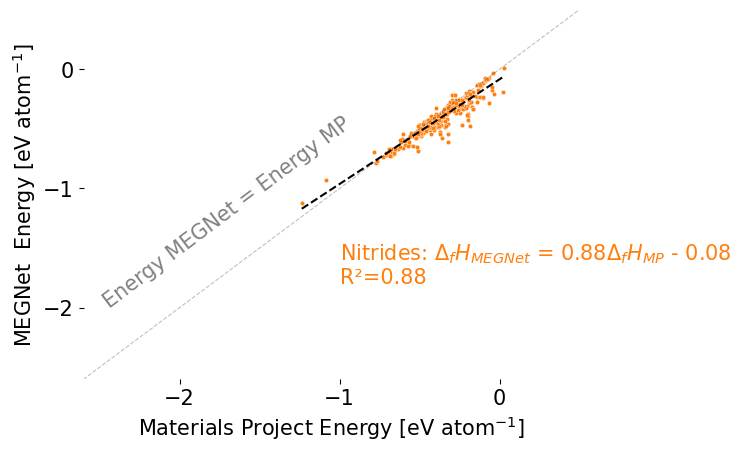

In [10]:
plt.figure()
model = LinearRegression().fit(df_MEGNET_hydrides['Ef'].values.reshape(-1, 1),
                                df_MEGNET_hydrides['Ef_MEGNET'].values.reshape(-1, 1))

y_pred = model.predict(df_MEGNET_hydrides['Ef'].values.reshape(-1, 1))

# Calculate the slope and intercept of the linear regression line

slope = float(model.coef_[0])
intercept = float(model.intercept_)

# Calculate the y=x line
y_equals_x = df_MEGNET_hydrides['Ef']


r2 = r2_score(df_MEGNET_hydrides['Ef_MEGNET'], y_pred.flatten())
df_MEGNET_hydrides['Absolute_error'] = (abs(df_MEGNET_hydrides['Ef_MEGNET'] - df_MEGNET_hydrides['Ef']))*1000
mean_nitrides = df_MEGNET_hydrides['Absolute_error'].mean()

print(f'MAE hydrides = {mean_nitrides:.2f} meV/atom')


g = sns.scatterplot(data=df_MEGNET_hydrides, 
                x='Ef', 
                y='Ef_MEGNET', 
                color='C1', 
                s=10
                   )
# Plot line y=x
plt.plot([-2.75, 1], [-2.75, 1], '--', color='black', alpha=0.25, linewidth=0.8)

# Plot linear regression line
g1 = sns.lineplot(x=df_MEGNET_hydrides['Ef'], y=y_pred.flatten(),
             color='black', linestyle='--', label=f'y(x) = {slope:.2f} * x + {intercept:.2f}', ax=g, )

Ef_MEGNET = r'$\it{\Delta}_f{H}_\mathrm{\mathit{MEGNet}}$'
Ef_MP = r'$\it{\Delta}_f{H}_\mathrm{\mathit{MP}}$'

plt.text(-2.5,-2,f'Energy MEGNet = Energy MP', color='black', alpha=0.5, size=15, rotation=37)

plt.text(-1,-1.6,f'Nitrides: {Ef_MEGNET} = {slope:.2f}{Ef_MP} - {abs(intercept):.2f}', color='C1', size=15)
plt.text(-1,-1.8,f'R²={r2:.2f}', color='C1', size=15)


plt.tick_params(which='major', labelsize=15)


plt.xlabel(r'Materials Project Energy [eV atom$^{-1}$]', fontsize=15)
plt.ylabel(r'MEGNet  Energy [eV atom$^{-1}$]', fontsize=15)

plt.box(False)
plt.yticks([0.0, -1.0, -2.0])
plt.xticks([0.0, -1.0, -2.0])

plt.xlim(-2.6, 0.5)
plt.ylim(-2.6, 0.5)


plt.legend().set_visible(False)    
plt.show()

